# A Semi-automatic Classification of Normal Karyotypes using Convolutional Neural Network Algorithm

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

## Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

%matplotlib inline

## Samples


## Chormosome Label Convert by using Dictionary

In [2]:
chromConvert = {'chr_09': 0,
                'chr_9_inversion': 1                
               }

## File Import

In [3]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\'
#pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\'
pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\'

theWhole = {}


f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
  
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  

theWhole['chr_09'] = f_09

theWhole['chr_9_inversion'] = f_9_inversion

In [4]:
theWhole['chr_9_inversion']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_9_inversion\\W27694-1.jpg.9inv.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_9_inversion\\W27694-10.jpg.9inv.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_9_inversion\\W27694-11.jpg.9inv.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_9_inversion\\W27694-12.jpg.9inv.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_9_inversion\\W27694-2_.jpg.9invs.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_9_inversion\\W27694-3.jpg.9inv.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_9_inversion\\W27694-4.jpg.9inv.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_9_inversion\\W27694-5.jpg.9inv.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\chr_9_inversion\\W27694-6.jpg.9inv.bmp',
 'D:\\Users\\Chuan\\Documents\\D

## Image Input

In [5]:
start = time.time()

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)
    
end = time.time()
print(end - start)

0.008969545364379883


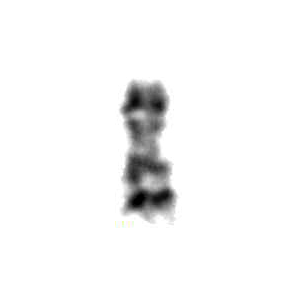

In [6]:
image['chr_9_inversion'][1]

## Functions

In [7]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [8]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

## Data Extraction from Images

In [9]:
start = time.time()

data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)
        
end = time.time()
print(end - start)

12.032837867736816


In [10]:
imageMatrix = np.array(data['chr_9_inversion'][1])

In [11]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)

In [12]:
len(x_train_list[1])

300

In [13]:
len(y_train_list)

109

### Validation Dataset

In [14]:
#pathBase = 'C:\\Users\\Chuan\\OneDrive\\Dowrun\\Database\\PhD\\KaryoTypes\\Arrangement\\test\\'
#pathBase = 'I:\\Chuan\\Documents\\MyData\\PhD\\Karyotype\\Arrangement\\test\\'
pathBase = 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement\\test\\'

theWhole = {}

f = []
f_09 = []
mypath_09 = pathBase + 'chr_09'
for (dirpath, dirnames, filenames) in walk(mypath_09):
    f.extend(filenames)
for l in f:
    f_09.append(mypath_09 + '\\' + l)    
    
  
# ///////// Abnormal ones //////////////

f = []
f_9_inversion = []
mypath_9_inversion = pathBase + 'chr_9_inversion'
for (dirpath, dirnames, filenames) in walk(mypath_9_inversion):
    f.extend(filenames)
for l in f:
    f_9_inversion.append(mypath_9_inversion + '\\' + l)  

theWhole['chr_09'] = f_09

theWhole['chr_9_inversion'] = f_9_inversion

In [15]:
image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in theWhole[chrNo]:
        img = Image.open(case)
        image[chrNo].append(img)    

### Data Extraction

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

## ChromConvert

In [18]:
y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

## Numpy Array

In [19]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [20]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [21]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
len(X_train)

109

In [23]:
len(y_train)

109

In [24]:
X_train[0].shape

(300, 300)

## Save the Datasets

In [25]:
np.save('X_train_2D_KaryoLearning_Abnormal', X_train)
np.save('y_train_2D_KaryoLearning_Abnormal', y_train)

In [26]:
np.save('X_test_2D_KaryoLearning_Abnormal', X_test)
np.save('y_test_2D_KaryoLearning_Abnormal', y_test)

## Load the Datasets

In [27]:
X_train = np.load('X_train_2D_KaryoLearning_Abnormal.npy')
y_train = np.load('y_train_2D_KaryoLearning_Abnormal.npy')

X_test = np.load('X_test_2D_KaryoLearning_Abnormal.npy')
y_test = np.load('y_test_2D_KaryoLearning_Abnormal.npy')

## Convolutional Neural Network

## Data Preparation

In [28]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### Training

#### Model

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [31]:
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(600, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

#### Tensorboard Initilization

In [32]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#### Compile the modal

In [33]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training

In [34]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/1000
4/4 [==============================] - 5s 574ms/step - loss: 15.3987 - accuracy: 0.7706 - val_loss: 17.8681 - val_accuracy: 0.5000
Epoch 2/1000
4/4 [==============================] - 0s 102ms/step - loss: 2.3268 - accuracy: 0.8899 - val_loss: 0.7384 - val_accuracy: 0.5000
Epoch 3/1000
4/4 [==============================] - 0s 87ms/step - loss: 0.9860 - accuracy: 0.8899 - val_loss: 0.8815 - val_accuracy: 0.5000
Epoch 4/1000
4/4 [==============================] - 0s 79ms/step - loss: 0.8420 - accuracy: 0.6147 - val_loss: 7.6505 - val_accuracy: 0.5000
Epoch 5/1000
4/4 [==============================] - 0s 86ms/step - loss: 1.3004 - accuracy: 0.8899 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 6/1000
4/4 [==============================] - 0s 86ms/step - loss: 0.8095 - accuracy: 0.8899 - val_loss: 0.7709 - val_accuracy: 0.5000
Epoch 7/1000
4/4 [==============================] - 0s 90ms/step - loss: 0.6877 - accuracy: 0.8899 - val_loss: 1.0632 - val_accuracy: 0.5000
Epoch 8/1

Epoch 58/1000
4/4 [==============================] - 0s 81ms/step - loss: 2.4902e-06 - accuracy: 1.0000 - val_loss: 4.2758e-04 - val_accuracy: 1.0000
Epoch 59/1000
4/4 [==============================] - 0s 83ms/step - loss: 2.2398e-06 - accuracy: 1.0000 - val_loss: 4.1789e-04 - val_accuracy: 1.0000
Epoch 60/1000
4/4 [==============================] - 0s 87ms/step - loss: 2.0724e-06 - accuracy: 1.0000 - val_loss: 4.0849e-04 - val_accuracy: 1.0000
Epoch 61/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.9084e-06 - accuracy: 1.0000 - val_loss: 4.0041e-04 - val_accuracy: 1.0000
Epoch 62/1000
4/4 [==============================] - 0s 82ms/step - loss: 1.7465e-06 - accuracy: 1.0000 - val_loss: 3.9300e-04 - val_accuracy: 1.0000
Epoch 63/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.6416e-06 - accuracy: 1.0000 - val_loss: 3.8577e-04 - val_accuracy: 1.0000
Epoch 64/1000
4/4 [==============================] - 0s 89ms/step - loss: 1.5027e-06 - accuracy: 1.0

4/4 [==============================] - 0s 86ms/step - loss: 8.2025e-08 - accuracy: 1.0000 - val_loss: 2.2406e-04 - val_accuracy: 1.0000
Epoch 113/1000
4/4 [==============================] - 0s 87ms/step - loss: 7.6556e-08 - accuracy: 1.0000 - val_loss: 2.2019e-04 - val_accuracy: 1.0000
Epoch 114/1000
4/4 [==============================] - 0s 87ms/step - loss: 7.4369e-08 - accuracy: 1.0000 - val_loss: 2.1701e-04 - val_accuracy: 1.0000
Epoch 115/1000
4/4 [==============================] - 0s 84ms/step - loss: 7.3275e-08 - accuracy: 1.0000 - val_loss: 2.1416e-04 - val_accuracy: 1.0000
Epoch 116/1000
4/4 [==============================] - 0s 81ms/step - loss: 7.1088e-08 - accuracy: 1.0000 - val_loss: 2.1182e-04 - val_accuracy: 1.0000
Epoch 117/1000
4/4 [==============================] - 0s 86ms/step - loss: 6.8901e-08 - accuracy: 1.0000 - val_loss: 2.0955e-04 - val_accuracy: 1.0000
Epoch 118/1000
4/4 [==============================] - 0s 92ms/step - loss: 6.5620e-08 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 90ms/step - loss: 2.0780e-08 - accuracy: 1.0000 - val_loss: 1.6691e-04 - val_accuracy: 1.0000
Epoch 167/1000
4/4 [==============================] - 0s 87ms/step - loss: 1.9686e-08 - accuracy: 1.0000 - val_loss: 1.6655e-04 - val_accuracy: 1.0000
Epoch 168/1000
4/4 [==============================] - 2s 521ms/step - loss: 1.9686e-08 - accuracy: 1.0000 - val_loss: 1.6616e-04 - val_accuracy: 1.0000
Epoch 169/1000
4/4 [==============================] - 0s 86ms/step - loss: 1.8592e-08 - accuracy: 1.0000 - val_loss: 1.6581e-04 - val_accuracy: 1.0000
Epoch 170/1000
4/4 [==============================] - 0s 81ms/step - loss: 1.8592e-08 - accuracy: 1.0000 - val_loss: 1.6541e-04 - val_accuracy: 1.0000
Epoch 171/1000
4/4 [==============================] - 0s 81ms/step - loss: 1.7499e-08 - accuracy: 1.0000 - val_loss: 1.6508e-04 - val_accuracy: 1.0000
Epoch 172/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.7499e-08 - accuracy: 1.0000 - v

4/4 [==============================] - 0s 89ms/step - loss: 8.7493e-09 - accuracy: 1.0000 - val_loss: 1.4788e-04 - val_accuracy: 1.0000
Epoch 221/1000
4/4 [==============================] - 0s 84ms/step - loss: 8.7493e-09 - accuracy: 1.0000 - val_loss: 1.4763e-04 - val_accuracy: 1.0000
Epoch 222/1000
4/4 [==============================] - 0s 89ms/step - loss: 8.7493e-09 - accuracy: 1.0000 - val_loss: 1.4726e-04 - val_accuracy: 1.0000
Epoch 223/1000
4/4 [==============================] - 0s 91ms/step - loss: 8.7493e-09 - accuracy: 1.0000 - val_loss: 1.4694e-04 - val_accuracy: 1.0000
Epoch 224/1000
4/4 [==============================] - 0s 88ms/step - loss: 8.7493e-09 - accuracy: 1.0000 - val_loss: 1.4665e-04 - val_accuracy: 1.0000
Epoch 225/1000
4/4 [==============================] - 0s 86ms/step - loss: 8.7493e-09 - accuracy: 1.0000 - val_loss: 1.4627e-04 - val_accuracy: 1.0000
Epoch 226/1000
4/4 [==============================] - 0s 87ms/step - loss: 7.6556e-09 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 84ms/step - loss: 4.3747e-09 - accuracy: 1.0000 - val_loss: 1.3353e-04 - val_accuracy: 1.0000
Epoch 275/1000
4/4 [==============================] - 0s 82ms/step - loss: 4.3747e-09 - accuracy: 1.0000 - val_loss: 1.3327e-04 - val_accuracy: 1.0000
Epoch 276/1000
4/4 [==============================] - 0s 107ms/step - loss: 4.3747e-09 - accuracy: 1.0000 - val_loss: 1.3309e-04 - val_accuracy: 1.0000
Epoch 277/1000
4/4 [==============================] - 0s 84ms/step - loss: 4.3747e-09 - accuracy: 1.0000 - val_loss: 1.3293e-04 - val_accuracy: 1.0000
Epoch 278/1000
4/4 [==============================] - 0s 85ms/step - loss: 4.3747e-09 - accuracy: 1.0000 - val_loss: 1.3279e-04 - val_accuracy: 1.0000
Epoch 279/1000
4/4 [==============================] - 0s 84ms/step - loss: 4.3747e-09 - accuracy: 1.0000 - val_loss: 1.3268e-04 - val_accuracy: 1.0000
Epoch 280/1000
4/4 [==============================] - 0s 85ms/step - loss: 4.3747e-09 - accuracy: 1.0000 - v

4/4 [==============================] - 0s 90ms/step - loss: 3.2810e-09 - accuracy: 1.0000 - val_loss: 1.2694e-04 - val_accuracy: 1.0000
Epoch 329/1000
4/4 [==============================] - 0s 84ms/step - loss: 3.2810e-09 - accuracy: 1.0000 - val_loss: 1.2684e-04 - val_accuracy: 1.0000
Epoch 330/1000
4/4 [==============================] - 0s 89ms/step - loss: 3.2810e-09 - accuracy: 1.0000 - val_loss: 1.2672e-04 - val_accuracy: 1.0000
Epoch 331/1000
4/4 [==============================] - 0s 89ms/step - loss: 3.2810e-09 - accuracy: 1.0000 - val_loss: 1.2653e-04 - val_accuracy: 1.0000
Epoch 332/1000
4/4 [==============================] - 0s 89ms/step - loss: 3.2810e-09 - accuracy: 1.0000 - val_loss: 1.2640e-04 - val_accuracy: 1.0000
Epoch 333/1000
4/4 [==============================] - 0s 83ms/step - loss: 3.2810e-09 - accuracy: 1.0000 - val_loss: 1.2627e-04 - val_accuracy: 1.0000
Epoch 334/1000
4/4 [==============================] - 0s 79ms/step - loss: 3.2810e-09 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 85ms/step - loss: 2.1873e-09 - accuracy: 1.0000 - val_loss: 1.2183e-04 - val_accuracy: 1.0000
Epoch 383/1000
4/4 [==============================] - 0s 86ms/step - loss: 2.1873e-09 - accuracy: 1.0000 - val_loss: 1.2176e-04 - val_accuracy: 1.0000
Epoch 384/1000
4/4 [==============================] - 0s 84ms/step - loss: 2.1873e-09 - accuracy: 1.0000 - val_loss: 1.2168e-04 - val_accuracy: 1.0000
Epoch 385/1000
4/4 [==============================] - 0s 86ms/step - loss: 2.1873e-09 - accuracy: 1.0000 - val_loss: 1.2158e-04 - val_accuracy: 1.0000
Epoch 386/1000
4/4 [==============================] - 0s 84ms/step - loss: 2.1873e-09 - accuracy: 1.0000 - val_loss: 1.2150e-04 - val_accuracy: 1.0000
Epoch 387/1000
4/4 [==============================] - 0s 86ms/step - loss: 2.1873e-09 - accuracy: 1.0000 - val_loss: 1.2141e-04 - val_accuracy: 1.0000
Epoch 388/1000
4/4 [==============================] - 0s 81ms/step - loss: 2.1873e-09 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 85ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1682e-04 - val_accuracy: 1.0000
Epoch 437/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1672e-04 - val_accuracy: 1.0000
Epoch 438/1000
4/4 [==============================] - 0s 89ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1664e-04 - val_accuracy: 1.0000
Epoch 439/1000
4/4 [==============================] - 0s 90ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1653e-04 - val_accuracy: 1.0000
Epoch 440/1000
4/4 [==============================] - 0s 87ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1646e-04 - val_accuracy: 1.0000
Epoch 441/1000
4/4 [==============================] - 0s 86ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1638e-04 - val_accuracy: 1.0000
Epoch 442/1000
4/4 [==============================] - 0s 87ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 87ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1192e-04 - val_accuracy: 1.0000
Epoch 491/1000
4/4 [==============================] - 0s 88ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1186e-04 - val_accuracy: 1.0000
Epoch 492/1000
4/4 [==============================] - 0s 89ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1181e-04 - val_accuracy: 1.0000
Epoch 493/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1174e-04 - val_accuracy: 1.0000
Epoch 494/1000
4/4 [==============================] - 0s 90ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1166e-04 - val_accuracy: 1.0000
Epoch 495/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.1154e-04 - val_accuracy: 1.0000
Epoch 496/1000
4/4 [==============================] - 0s 90ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 88ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0775e-04 - val_accuracy: 1.0000
Epoch 545/1000
4/4 [==============================] - 0s 92ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0767e-04 - val_accuracy: 1.0000
Epoch 546/1000
4/4 [==============================] - 0s 80ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0759e-04 - val_accuracy: 1.0000
Epoch 547/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0753e-04 - val_accuracy: 1.0000
Epoch 548/1000
4/4 [==============================] - 0s 86ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0748e-04 - val_accuracy: 1.0000
Epoch 549/1000
4/4 [==============================] - 0s 83ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0742e-04 - val_accuracy: 1.0000
Epoch 550/1000
4/4 [==============================] - 0s 91ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 83ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0458e-04 - val_accuracy: 1.0000
Epoch 599/1000
4/4 [==============================] - 0s 82ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0453e-04 - val_accuracy: 1.0000
Epoch 600/1000
4/4 [==============================] - 0s 87ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0447e-04 - val_accuracy: 1.0000
Epoch 601/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0443e-04 - val_accuracy: 1.0000
Epoch 602/1000
4/4 [==============================] - 0s 89ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0439e-04 - val_accuracy: 1.0000
Epoch 603/1000
4/4 [==============================] - 0s 90ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0435e-04 - val_accuracy: 1.0000
Epoch 604/1000
4/4 [==============================] - 0s 92ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 90ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0254e-04 - val_accuracy: 1.0000
Epoch 653/1000
4/4 [==============================] - 0s 90ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0251e-04 - val_accuracy: 1.0000
Epoch 654/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0247e-04 - val_accuracy: 1.0000
Epoch 655/1000
4/4 [==============================] - 0s 87ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0244e-04 - val_accuracy: 1.0000
Epoch 656/1000
4/4 [==============================] - 0s 86ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0241e-04 - val_accuracy: 1.0000
Epoch 657/1000
4/4 [==============================] - 0s 84ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0239e-04 - val_accuracy: 1.0000
Epoch 658/1000
4/4 [==============================] - 0s 92ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 96ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0074e-04 - val_accuracy: 1.0000
Epoch 707/1000
4/4 [==============================] - 0s 94ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0074e-04 - val_accuracy: 1.0000
Epoch 708/1000
4/4 [==============================] - 0s 87ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0073e-04 - val_accuracy: 1.0000
Epoch 709/1000
4/4 [==============================] - 0s 92ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0073e-04 - val_accuracy: 1.0000
Epoch 710/1000
4/4 [==============================] - 0s 92ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0072e-04 - val_accuracy: 1.0000
Epoch 711/1000
4/4 [==============================] - 0s 94ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - val_loss: 1.0067e-04 - val_accuracy: 1.0000
Epoch 712/1000
4/4 [==============================] - 0s 92ms/step - loss: 1.0937e-09 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.8540e-05 - val_accuracy: 1.0000
Epoch 761/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.8480e-05 - val_accuracy: 1.0000
Epoch 762/1000
4/4 [==============================] - 0s 97ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.8433e-05 - val_accuracy: 1.0000
Epoch 763/1000
4/4 [==============================] - 0s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.8361e-05 - val_accuracy: 1.0000
Epoch 764/1000
4/4 [==============================] - 0s 101ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.8290e-05 - val_accuracy: 1.0000
Epoch 765/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.8219e-05 - val_accuracy: 1.0000
Epoch 766/1000
4/4 [==============================] - 0s 100ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - 

4/4 [==============================] - 0s 95ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.5238e-05 - val_accuracy: 1.0000
Epoch 815/1000
4/4 [==============================] - 0s 96ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.5196e-05 - val_accuracy: 1.0000
Epoch 816/1000
4/4 [==============================] - 0s 91ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.5143e-05 - val_accuracy: 1.0000
Epoch 817/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.5095e-05 - val_accuracy: 1.0000
Epoch 818/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.5042e-05 - val_accuracy: 1.0000
Epoch 819/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.4994e-05 - val_accuracy: 1.0000
Epoch 820/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 95ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.2269e-05 - val_accuracy: 1.0000
Epoch 869/1000
4/4 [==============================] - 0s 98ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.2221e-05 - val_accuracy: 1.0000
Epoch 870/1000
4/4 [==============================] - 0s 91ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.2168e-05 - val_accuracy: 1.0000
Epoch 871/1000
4/4 [==============================] - 0s 100ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.2126e-05 - val_accuracy: 1.0000
Epoch 872/1000
4/4 [==============================] - 0s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.2090e-05 - val_accuracy: 1.0000
Epoch 873/1000
4/4 [==============================] - 0s 91ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.2049e-05 - val_accuracy: 1.0000
Epoch 874/1000
4/4 [==============================] - 0s 95ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - v

4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.9853e-05 - val_accuracy: 1.0000
Epoch 923/1000
4/4 [==============================] - 0s 93ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.9812e-05 - val_accuracy: 1.0000
Epoch 924/1000
4/4 [==============================] - 0s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.9770e-05 - val_accuracy: 1.0000
Epoch 925/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.9722e-05 - val_accuracy: 1.0000
Epoch 926/1000
4/4 [==============================] - 0s 98ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.9687e-05 - val_accuracy: 1.0000
Epoch 927/1000
4/4 [==============================] - 0s 97ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.9627e-05 - val_accuracy: 1.0000
Epoch 928/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - va

4/4 [==============================] - 0s 89ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.7574e-05 - val_accuracy: 1.0000
Epoch 977/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.7533e-05 - val_accuracy: 1.0000
Epoch 978/1000
4/4 [==============================] - 0s 94ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.7497e-05 - val_accuracy: 1.0000
Epoch 979/1000
4/4 [==============================] - 0s 96ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.7461e-05 - val_accuracy: 1.0000
Epoch 980/1000
4/4 [==============================] - 0s 92ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.7425e-05 - val_accuracy: 1.0000
Epoch 981/1000
4/4 [==============================] - 0s 114ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 8.7384e-05 - val_accuracy: 1.0000
Epoch 982/1000
4/4 [==============================] - 0s 95ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - v

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 322624)            0         
_________________________________________________________________
dense (Dense)                (None, 300)               9

### Tensorboard Display

In [36]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 19276), started 5:38:47 ago. (Use '!kill 19276' to kill it.)

## Performance Measures

In [37]:
#y_predict = clf.predict(X_test)
#y_test = y_test

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 1.000


In [38]:
len(X_test)

20

In [39]:
y_predict = model.predict(X_test)

In [40]:
y_predict

array([[1.00000000e+00, 3.25636589e-03],
       [1.00000000e+00, 5.28640160e-03],
       [1.00000000e+00, 7.35977367e-02],
       [9.99951720e-01, 1.73722118e-01],
       [1.00000000e+00, 6.39594952e-03],
       [1.00000000e+00, 2.24205595e-03],
       [1.00000000e+00, 8.59729294e-03],
       [1.00000000e+00, 3.06860544e-03],
       [1.00000000e+00, 2.69924216e-02],
       [1.00000000e+00, 6.21295460e-02],
       [7.57982050e-08, 1.00000000e+00],
       [2.17916421e-03, 9.99982834e-01],
       [6.32666675e-09, 1.00000000e+00],
       [7.30803322e-07, 1.00000000e+00],
       [1.78292971e-02, 9.99264419e-01],
       [1.15515426e-01, 9.87090528e-01],
       [1.67566114e-07, 1.00000000e+00],
       [2.09929445e-03, 9.99984622e-01],
       [1.27304187e-02, 9.99754608e-01],
       [3.19423177e-03, 9.99969125e-01]], dtype=float32)

In [41]:
y_predict[0]

array([1.        , 0.00325637], dtype=float32)

In [42]:
# The number 34 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []
y_predict_filtered_prob = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)
    y_predict_filtered_prob.append(maximum)

### Confusion Matrix (混淆矩阵)

In [43]:
label = ['chr_09', 'chr_9_inversion']

In [44]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label,
                        columns=label)
confusion.to_csv('ConfusionMatrix_KaryoType_CNN.csv')
confusion

chr_09  chr_9_inversion
chr_09               10                0
chr_9_inversion       0               10

In [45]:
print(classification_report(y_test, y_predict_filtered))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



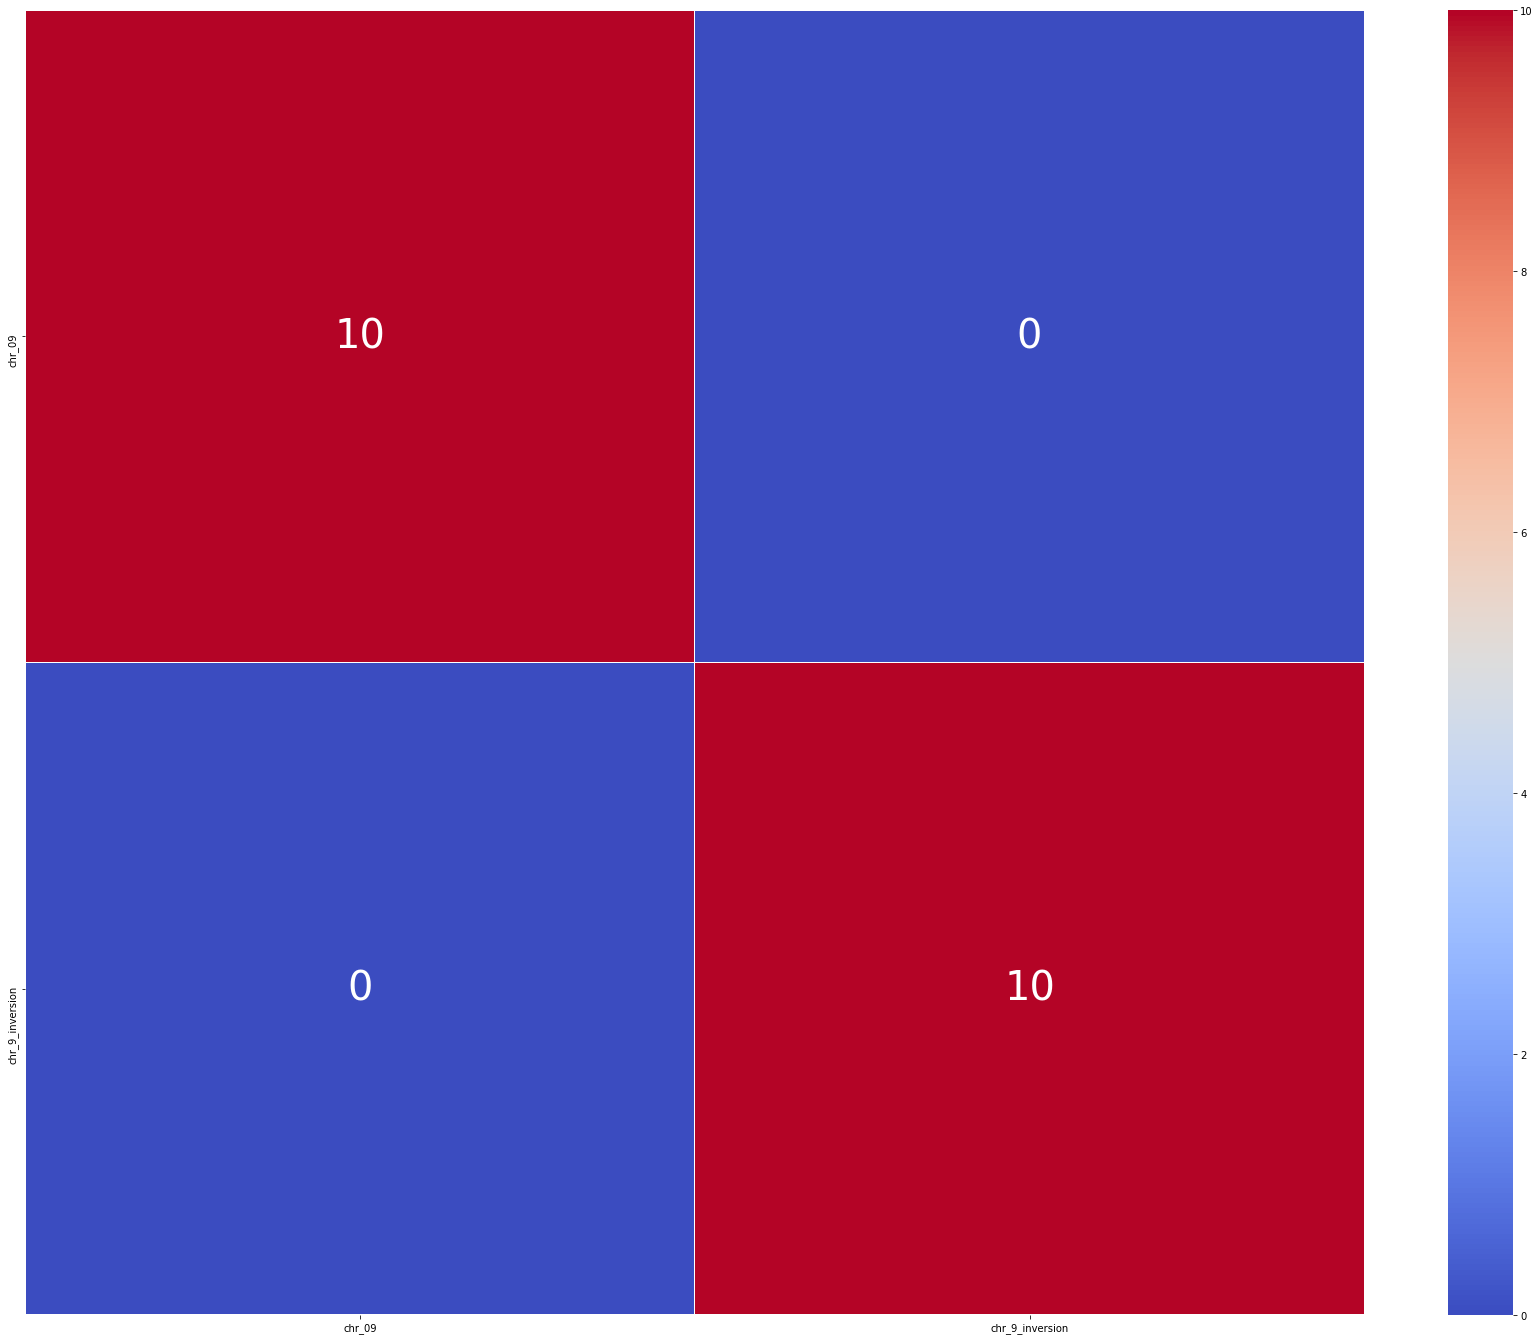

In [46]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 40})

## Save the Model

In [47]:
model.save('saved_model/model_cnn')

INFO:tensorflow:Assets written to: saved_model/model_cnn\assets


## Load the Model

In [48]:
model_reload = keras.models.load_model('saved_model/model_cnn')

In [49]:
y_predict = model_reload.predict(X_test)

In [50]:
y_predict

array([[1.00000000e+00, 3.25636589e-03],
       [1.00000000e+00, 5.28640160e-03],
       [1.00000000e+00, 7.35977367e-02],
       [9.99951720e-01, 1.73722118e-01],
       [1.00000000e+00, 6.39594952e-03],
       [1.00000000e+00, 2.24205595e-03],
       [1.00000000e+00, 8.59729294e-03],
       [1.00000000e+00, 3.06860544e-03],
       [1.00000000e+00, 2.69924216e-02],
       [1.00000000e+00, 6.21295460e-02],
       [7.57982050e-08, 1.00000000e+00],
       [2.17916421e-03, 9.99982834e-01],
       [6.32666675e-09, 1.00000000e+00],
       [7.30803322e-07, 1.00000000e+00],
       [1.78292971e-02, 9.99264419e-01],
       [1.15515426e-01, 9.87090528e-01],
       [1.67566114e-07, 1.00000000e+00],
       [2.09929445e-03, 9.99984622e-01],
       [1.27304187e-02, 9.99754608e-01],
       [3.19423177e-03, 9.99969125e-01]], dtype=float32)

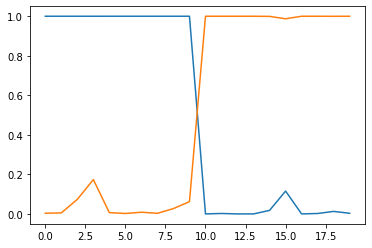

In [51]:
plt.plot(y_predict)

In [52]:
y_predict_score = np.round_(y_predict[:,1])

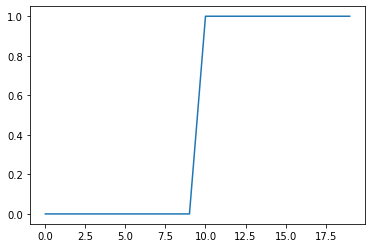

In [53]:
plt.plot(y_predict_score)

In [54]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
y_predict_score

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)

## ROC

In [56]:
y_predict

array([[1.00000000e+00, 3.25636589e-03],
       [1.00000000e+00, 5.28640160e-03],
       [1.00000000e+00, 7.35977367e-02],
       [9.99951720e-01, 1.73722118e-01],
       [1.00000000e+00, 6.39594952e-03],
       [1.00000000e+00, 2.24205595e-03],
       [1.00000000e+00, 8.59729294e-03],
       [1.00000000e+00, 3.06860544e-03],
       [1.00000000e+00, 2.69924216e-02],
       [1.00000000e+00, 6.21295460e-02],
       [7.57982050e-08, 1.00000000e+00],
       [2.17916421e-03, 9.99982834e-01],
       [6.32666675e-09, 1.00000000e+00],
       [7.30803322e-07, 1.00000000e+00],
       [1.78292971e-02, 9.99264419e-01],
       [1.15515426e-01, 9.87090528e-01],
       [1.67566114e-07, 1.00000000e+00],
       [2.09929445e-03, 9.99984622e-01],
       [1.27304187e-02, 9.99754608e-01],
       [3.19423177e-03, 9.99969125e-01]], dtype=float32)

In [57]:
np.round_(y_predict_score)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)

In [71]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict[:,1])
auc_rf = auc(fpr, tpr)

In [72]:
fpr

array([0., 0., 0., 1.])

In [73]:
tpr

array([0. , 0.4, 1. , 1. ])

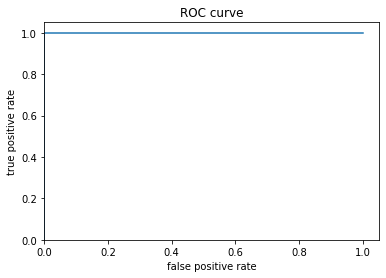

In [74]:
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

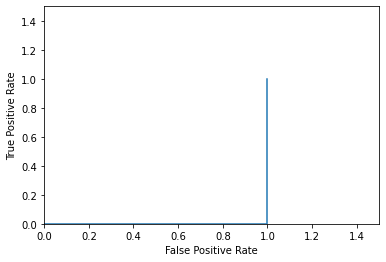

In [75]:
def plot_roc_curve(fpr,tpr): 
    plt.plot(tpr, fpr) 
    plt.axis([0,1.5,0,1.5]) 
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    

plot_roc_curve (fpr,tpr) 

In [76]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_predict)

ValueError: bad input shape (20, 2)

In [ ]:
y_predict_selected

In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_predict_selected)

In [ ]:
metrics.plot_roc_curve(model, X_test, y_test)

In [ ]:
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

In [ ]:
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(tpr, fpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 

In [ ]:
y_score